In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [56]:
cocacola = pd.read_csv("CocaCola_Sales_Rawdata1.csv")

In [10]:
cocacola_1 = cocacola.copy()

## EDA

In [11]:
cocacola_1.head().T

,0,1,2,3,4
Quarter,Q1_86,Q2_86,Q3_86,Q4_86,Q1_87
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996


In [12]:
cocacola_1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [13]:
cocacola_1.dtypes

Quarter     object
Sales      float64
dtype: object

In [14]:
cocacola_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [17]:
temp = cocacola_1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [18]:
cocacola_1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [19]:
cocacola_1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [22]:
cocacola_2 = cocacola_1.drop(['Quarter'], axis=1)

In [23]:
cocacola_2.reset_index(inplace=True)

In [57]:
cocacola_2

,index,Sales,quater
0,0,1734.827000,Jan-1986
1,1,2244.960999,Apr-1986
2,2,2533.804993,Jul-1986
3,3,2154.962997,Oct-1986
4,4,1547.818996,Jan-1987
5,5,2104.411995,Apr-1987
6,6,2014.362999,Jul-1987
7,7,1991.746998,Oct-1987
8,8,1869.049999,Jan-1988
9,9,2313.631996,Apr-1988


In [25]:
cocacola_2.head()

,index,Sales,quater
0,0,1734.827000,Jan-1986
1,1,2244.960999,Apr-1986
2,2,2533.804993,Jul-1986
3,3,2154.962997,Oct-1986
4,4,1547.818996,Jan-1987


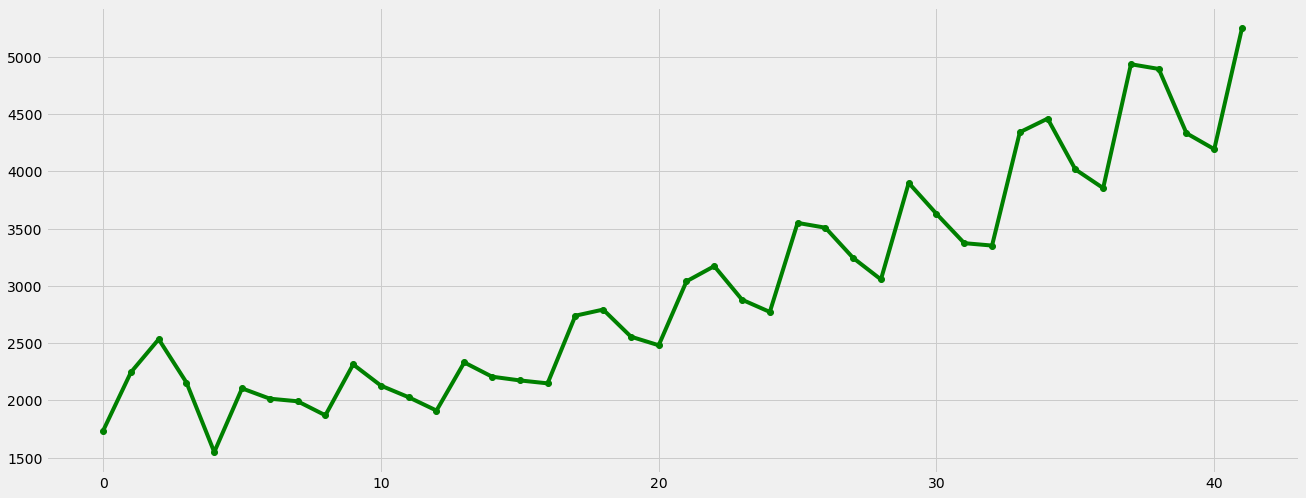

In [27]:
cocacola_2['Sales'].plot(figsize=(20, 8),color='green',marker='o')
plt.show()

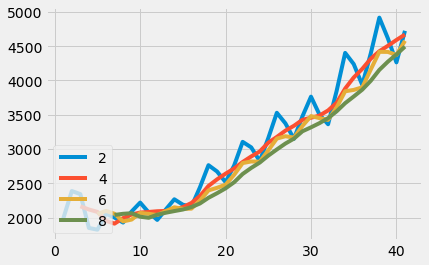

In [29]:
for i in range(2,10,2):
    cocacola_1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

## Building Time series forecasting with ARIMA

In [32]:
X = cocacola_2['Sales'].values

In [33]:
size = int(len(X) * 0.66)

In [34]:
train, test = X[0:size], X[size:len(X)]

In [35]:
model = ARIMA(train, order=(5,1,0))

In [36]:
model_fit = model.fit(disp=0)

In [37]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Fri, 21 Jul 2023   AIC                            358.071
Time:                        17:01:41   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8433     26.509      1.578      0.114     -10.113      93.799
ar.L1.D.y     -0.1479      0.195     -0.758      0.448      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

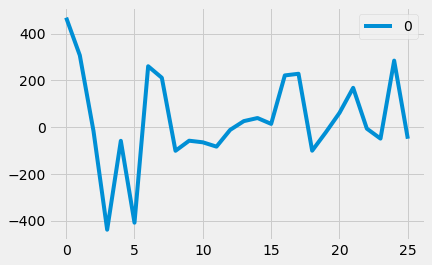

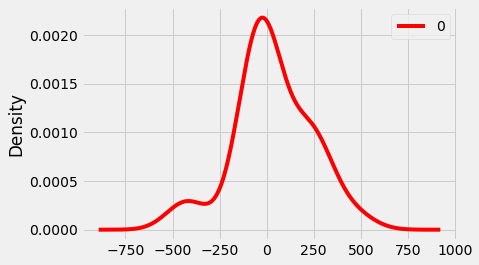

                0
count   26.000000
mean    31.326031
std    202.029718
min   -438.904173
25%    -58.602849
50%     -9.190301
75%    200.236752
max    468.290703


In [38]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='red')
pyplot.show()
print(residuals.describe())

## Rolling Forecast ARIMA Model

In [39]:
history = [x for x in train]

In [40]:
predictions = list()

In [41]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3135.586405, expected=3243.859993
predicted=3188.846080, expected=3056.000000
predicted=3734.223936, expected=3899.000000
predicted=3782.620507, expected=3629.000000
predicted=3355.125246, expected=3373.000000
predicted=3297.218164, expected=3352.000000
predicted=4112.813460, expected=4342.000000
predicted=3961.043740, expected=4461.000000
predicted=4130.787387, expected=4017.000000
predicted=3912.795507, expected=3854.000000
predicted=4687.044129, expected=4936.000000
predicted=4970.518093, expected=4895.000000
predicted=4384.039717, expected=4333.000000
predicted=4229.063163, expected=4194.000000
predicted=5261.671920, expected=5253.000000


In [42]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 31594.741


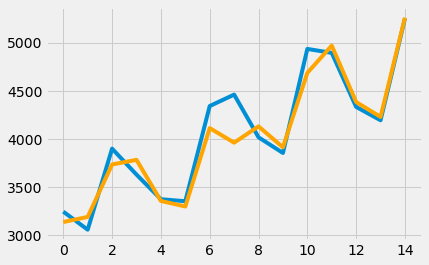

In [43]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()

## Comparing Multiple Models

In [44]:
cocacola_3 = pd.get_dummies(cocacola, columns = ['Quarter'])

In [45]:
cocacola_3.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [51]:
cocacola_3.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,1.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000


In [62]:
t= np.arange(1,43)

In [63]:
cocacola_3['t'] = t

In [64]:
cocacola_3['t_sq'] = cocacola_3['t']*cocacola_3['t']

In [65]:
log_Sales=np.log(cocacola_3['Sales'])

In [66]:
cocacola_3['log_Sales']=log_Sales

In [67]:
cocacola_3.head().T

,0,1,2,3,4
Sales,1734.827000,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,1.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
train1, test1 = np.split(cocacola_3, [int(.67 *len(cocacola_3))])

In [69]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224131670772

In [70]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.729797532387

In [71]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.140510563996

In [72]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188208994419

In [73]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282860352

In [74]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436083738

In [75]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.919440782242

In [76]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911700761

In [77]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467271813

## Conclusion

In [78]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [79]:
rmse=pd.DataFrame(output)

In [80]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140511
5        rmselin   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912
8       rmsequad   783.729798
